In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('../data/datlas.csv')

In [5]:
df.head()

,"FOLIO_ID,LAT,LONG,CODIGO POSTAL,CALLE,COLONIA,CAUSA SINIESTRO,TIPO VEHICULO,COLOR,MODELO_VEHICULO,NIVEL DAÑO VEHICULO,PUNTO DE IMPACTO,AÑO,MES,DÍA NUMERO,DIA,HORA,ESTADO,CIUDAD_APROXIMADA,DATE",Unnamed: 1,Unnamed: 2
0,"D00001,22.7685068,-102.5678956,98000,*EP 2 Bou...",NaN,NaN
1,"D00002,25.6473508,-100.1401324,67277,AMERICA 6...",NaN,NaN
2,"D00003,20.6799172,-103.3686565,44600,AV MEXICO...",NaN,NaN
3,"D00004,25.7180268,-100.2499903,66480,Avenida C...",NaN,NaN
4,"D00005,19.2663028,-99.3317914,\N,UBERP3,Cuajim...",NaN,NaN


## Reformatear datos

In [6]:

df1 = pd.DataFrame([ x.split(',') for x in df['FOLIO_ID,LAT,LONG,CODIGO POSTAL,CALLE,COLONIA,CAUSA SINIESTRO,TIPO VEHICULO,COLOR,MODELO_VEHICULO,NIVEL DAÑO VEHICULO,PUNTO DE IMPACTO,AÑO,MES,DÍA NUMERO,DIA,HORA,ESTADO,CIUDAD_APROXIMADA,DATE'].tolist() ])

In [7]:
df1 = df1.rename(columns={0: "FOLIO_ID", 1: "LAT", 2: "LONG", 3: "CODIGO POSTAL", 4: "CALLE", 5: "COLONIA", 6: "CAUSA SINIESTRO", 7: "TIPO VEHICULO", 8: "COLOR", 9: "MODELO_VEHICULO", 10: "NIVEL DANO VEHICULO", 11: "PUNTO DE IMPACTO", 12: "ANO", 13: "MES", 14: "DIA NUMERO", 15: "DIA", 16: "HORA", 17: "ESTADO", 18: "CIUDAD_APROXIMADA", 19: "DATE"})

In [8]:
df1.head()

,FOLIO_ID,LAT,LONG,CODIGO POSTAL,CALLE,COLONIA,CAUSA SINIESTRO,TIPO VEHICULO,COLOR,MODELO_VEHICULO,NIVEL DANO VEHICULO,PUNTO DE IMPACTO,ANO,MES,DIA NUMERO,DIA,HORA,ESTADO,CIUDAD_APROXIMADA,DATE
0,D00001,22.7685068,-102.5678956,98000,*EP 2 Boulevard Adolfo López Mateos,CERRADA DE CASA BLANCA,COLISION Y/O VUELCO,Camión,BLANCO,2016,Bajo,NA,2018,1,11,JUEVES,15,NUEVO LEÓN,SAN NICOLAS DE LOS GARZA,11/01/2018
1,D00002,25.6473508,-100.1401324,67277,AMERICA 65,BALCONES DE ZINDARO,COLISION Y/O VUELCO,Camión,BLANCO,2009,Sin daño,Costado izq trasero,2018,1,25,JUEVES,10,NUEVO LEÓN,JUAREZ,25/01/2018
2,D00003,20.6799172,-103.3686565,44600,AV MEXICO,2 RIOS,COLISION Y/O VUELCO,Auto,BLANCO,2005,Sin daño,Trasero,2018,1,15,LUNES,9,NUEVO LEÓN,GUADALUPE,15/01/2018
3,D00004,25.7180268,-100.2499903,66480,Avenida Conductores,Conductores Infonavit,COLISION Y/O VUELCO,Auto,GRIS,2016,Sin daño,Frontal,2018,1,19,VIERNES,9,NUEVO LEÓN,SAN NICOLAS DE LOS GARZA,19/01/2018
4,D00005,19.2663028,-99.3317914,\N,UBERP3,Cuajimalpa,HUELGAS Y ALBOROTOS,Auto,NEGRO,2016,Medio,NA,2018,1,3,MIERCOLES,16,NUEVO LEÓN,MONTERREY,03/01/2018


In [9]:
df1.describe()

,FOLIO_ID,LAT,LONG,CODIGO POSTAL,CALLE,COLONIA,CAUSA SINIESTRO,TIPO VEHICULO,COLOR,MODELO_VEHICULO,NIVEL DANO VEHICULO,PUNTO DE IMPACTO,ANO,MES,DIA NUMERO,DIA,HORA,ESTADO,CIUDAD_APROXIMADA,DATE
count,116011,116011,116011,116011,116011,116004,116004,116004,116004,116004,116004,116004,116004,116004,116004,116004,116004,116004,116004,116003
unique,116011,84842,85521,858,47748,20652,7,6,2745,66,6,15,3,12,31,7,24,1,98,911
top,D16532,0,0,0,Avenida Eugenio Garza Sada,Monterrey Centro,COLISION Y/O VUELCO,Auto,BLANCO,2012,Bajo,Trasero,2016,5,4,VIERNES,14,NUEVO LEÓN,MONTERREY,04/05/2017
freq,1,9602,9602,9481,949,4216,113861,86795,32366,9802,58360,25915,54728,12538,4233,19410,8845,116004,48738,439


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116011 entries, 0 to 116010
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   FOLIO_ID             116011 non-null  object
 1   LAT                  116011 non-null  object
 2   LONG                 116011 non-null  object
 3   CODIGO POSTAL        116011 non-null  object
 4   CALLE                116011 non-null  object
 5   COLONIA              116004 non-null  object
 6   CAUSA SINIESTRO      116004 non-null  object
 7   TIPO VEHICULO        116004 non-null  object
 8   COLOR                116004 non-null  object
 9   MODELO_VEHICULO      116004 non-null  object
 10  NIVEL DANO VEHICULO  116004 non-null  object
 11  PUNTO DE IMPACTO     116004 non-null  object
 12  ANO                  116004 non-null  object
 13  MES                  116004 non-null  object
 14  DIA NUMERO           116004 non-null  object
 15  DIA                  116004 non-nu

### Descartar datos invalidos

In [11]:
import sklearn

In [12]:
df_test = sklearn.utils.shuffle(df1)

In [13]:
def drop_value(df_input, column, val):
    indexNames = df_input[df_input[column] == val].index
    # Delete these row indexes from dataFrame
    df_input.drop(indexNames, inplace=True)

## Descartar datos invalidos

In [14]:
drop_value(df_test, 'LAT', '0')
drop_value(df_test, 'CODIGO POSTAL', '0')
drop_value(df_test, 'LAT', '')
drop_value(df_test, 'COLONIA', '')
drop_value(df_test, 'CAUSA SINIESTRO', '')
drop_value(df_test, 'TIPO VEHICULO', '')
drop_value(df_test, 'COLOR', '')
drop_value(df_test, 'MODELO_VEHICULO', '')

drop_value(df_test, 'CODIGO POSTAL', '\\N')
drop_value(df_test, 'CALLE', '\\N')
drop_value(df_test, 'COLONIA', '\\N')
drop_value(df_test, 'CAUSA SINIESTRO', '\\N')
drop_value(df_test, 'COLOR', '\\N')
drop_value(df_test, 'MODELO_VEHICULO', '\\N')
drop_value(df_test, 'NIVEL DANO VEHICULO', '\\N')
drop_value(df_test, 'PUNTO DE IMPACTO', '\\N')
drop_value(df_test, 'ANO', '\\N')
drop_value(df_test, 'CIUDAD_APROXIMADA', '\\N')
drop_value(df_test, 'PUNTO DE IMPACTO', 'NA')

C:\Users\efren\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
df_test = df_test.drop(['COLOR', 'TIPO VEHICULO', 'CAUSA SINIESTRO', 'PUNTO DE IMPACTO', 'ESTADO', 'FOLIO_ID', 'DATE'], axis=1)

In [16]:
df_test.dropna(inplace=True)

## Convertir valores a númericos

In [17]:
df_test = df_test[df_test['CODIGO POSTAL'].apply(lambda x: str(x).isnumeric())]

In [18]:
di = {'Sin daño': 0, 'Bajo': 1, 'Medio': 2, 'Alto': 4}
df_test = df_test.replace({'NIVEL DANO VEHICULO': di})

In [19]:
di_2 = {'LUNES': 0, 'MARTES': 1, 'MIERCOLES': 2, 'JUEVES': 3, 'VIERNES': 4, 'SABADO': 5, 'DOMINGO': 6}
df_test = df_test.replace({'DIA': di_2})

In [20]:
df_test['LAT'] = df_test['LAT'].astype(float)
df_test['LONG'] = df_test['LONG'].astype(float)
df_test['DIA NUMERO'] = df_test['DIA NUMERO'].astype(float)
df_test['DIA'] = df_test['DIA'].astype(float)
df_test['HORA'] = df_test['HORA'].astype(float)
df_test['MES'] = df_test['MES'].astype(float)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93785 entries, 18093 to 17235
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LAT                  93785 non-null  float64
 1   LONG                 93785 non-null  float64
 2   CODIGO POSTAL        93785 non-null  object 
 3   CALLE                93785 non-null  object 
 4   COLONIA              93785 non-null  object 
 5   MODELO_VEHICULO      93785 non-null  object 
 6   NIVEL DANO VEHICULO  93785 non-null  int64  
 7   ANO                  93785 non-null  object 
 8   MES                  93785 non-null  float64
 9   DIA NUMERO           93785 non-null  float64
 10  DIA                  93785 non-null  float64
 11  HORA                 93785 non-null  float64
 12  CIUDAD_APROXIMADA    93785 non-null  object 
dtypes: float64(6), int64(1), object(6)
memory usage: 10.0+ MB


## Geohash

In [21]:
df_test = df_test.round({'LAT': 3, 'LONG': 3})

In [22]:
# Get names of indexes for which column Age has value 30
indexNames = df_test[(df_test['LAT'] <= 23.1763) | (df_test['LAT'] >= 27.7814)].index
# Delete these row indexes from dataFrame
df_test.drop(indexNames , inplace=True)

In [23]:
# Get names of indexes for which column Age has value 30
indexNames = df_test[(df_test['LONG'] <= -101.2307) | (df_test['LONG'] >= -98.4633)].index
# Delete these row indexes from dataFrame
df_test.drop(indexNames , inplace=True)

In [24]:
from geolib import geohash

In [25]:
def encode_geohash (row):
    return geohash.encode(row['LAT'], row['LONG'], 5)

In [26]:
df_test['GEOHASH'] = df_test.apply (lambda row: encode_geohash(row), axis=1)

In [27]:
df_test.head()

,LAT,LONG,CODIGO POSTAL,CALLE,COLONIA,MODELO_VEHICULO,NIVEL DANO VEHICULO,ANO,MES,DIA NUMERO,DIA,HORA,CIUDAD_APROXIMADA,GEOHASH
18093,25.963,-100.180,65558,Calle de los Maestros,Fracc Lomas de Ciénega,2006,0,2017,1.0,2.0,0.0,9.0,CIENEGA DE FLORES,9u8g8
96728,25.781,-100.198,66600,Reforma,Homero Sepúlveda,2012,1,2016,8.0,23.0,1.0,12.0,APODACA,9u8dx
43095,25.752,-100.129,66673,Via Rapida al Aeropuerto,Lomas de San Martín,2013,1,2017,7.0,25.0,1.0,6.0,PESQUERIA,9u8f9
31071,25.805,-100.271,66052,calle ciruelo 321,Col residencial rincones C.P. 66050,2015,1,2017,4.0,17.0,0.0,14.0,GENERAL ESCOBEDO,9u8dy
66878,25.680,-100.333,6400,Nicolás Bravo,Zona Centro,2008,0,2016,2.0,4.0,3.0,15.0,MONTERREY,9u8dh


## Explorar datos

In [28]:
df_min = sklearn.utils.shuffle(df_test[0:40000])

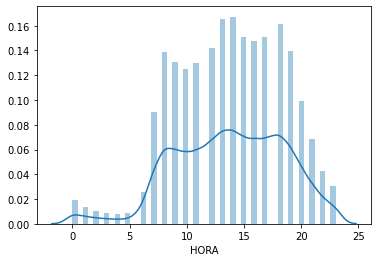

In [29]:
sns.distplot(df_min['HORA'])

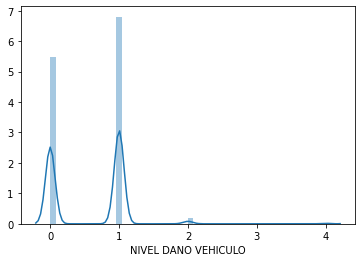

In [30]:
sns.distplot(df_min['NIVEL DANO VEHICULO'])

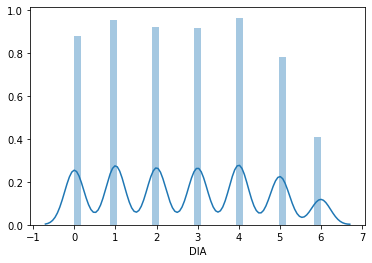

In [31]:
sns.distplot(df_min['DIA'])

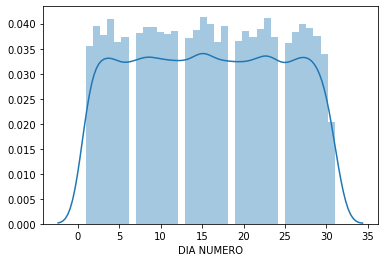

In [32]:
sns.distplot(df_min['DIA NUMERO'])

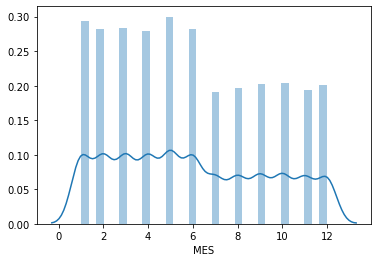

In [33]:
sns.distplot(df_min['MES'])

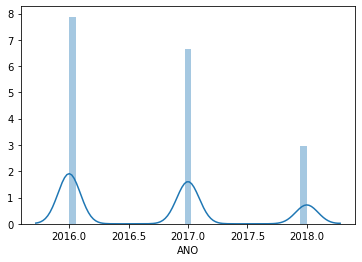

In [34]:
sns.distplot(df_min['ANO'])

## Encontrar relaciones y dependencias

In [35]:
import scipy.stats as stats


In [36]:
def show_rel(X_str, y_str, df_data): 
    g = sns.jointplot(x=X_str,y=y_str,data=df_data,color='red',kind='kde');
    g.annotate(stats.pearsonr)
    plt.show()

C:\Users\efren\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


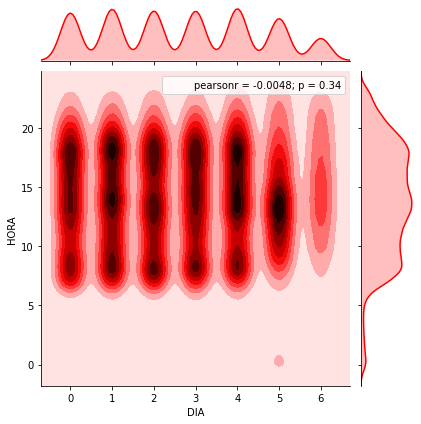

In [37]:
show_rel('DIA', 'HORA', df_min)

C:\Users\efren\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


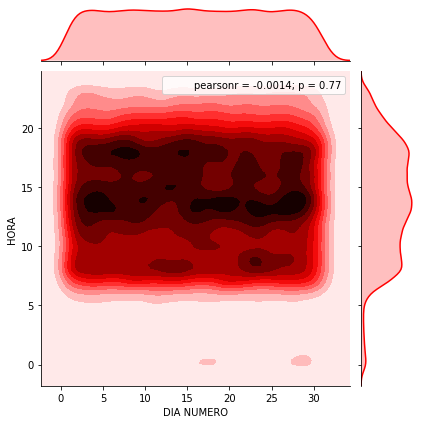

In [38]:
show_rel('DIA NUMERO', 'HORA', df_min)

#### DIA NUMERO VS MES

C:\Users\efren\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


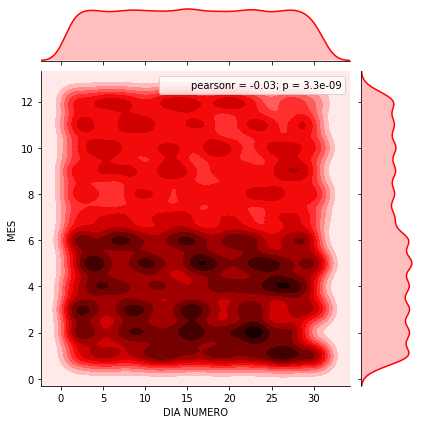

In [39]:
show_rel('DIA NUMERO', 'MES', df_min)

C:\Users\efren\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


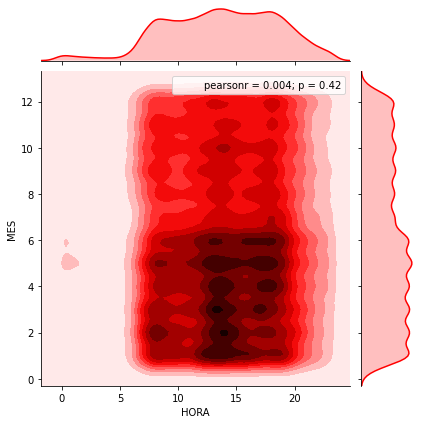

In [40]:
show_rel('HORA', 'MES', df_min)

C:\Users\efren\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


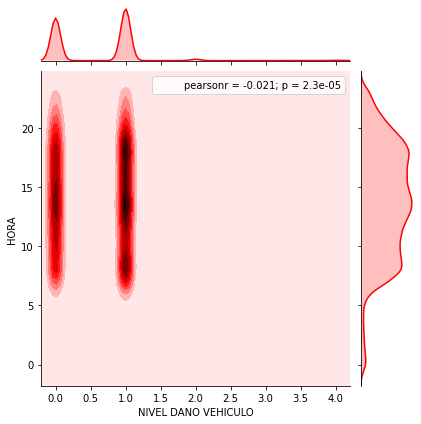

In [41]:
show_rel('NIVEL DANO VEHICULO', 'HORA', df_min)

C:\Users\efren\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


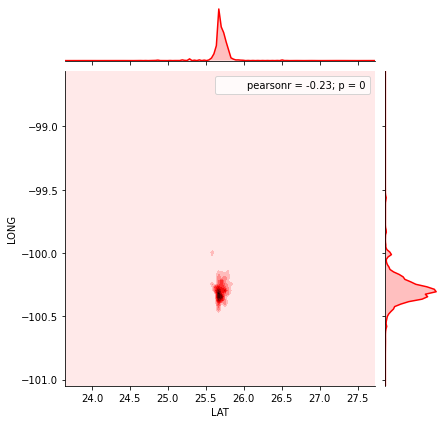

In [42]:
show_rel('LAT', 'LONG', df_min)

In [43]:
df_min.head()

,LAT,LONG,CODIGO POSTAL,CALLE,COLONIA,MODELO_VEHICULO,NIVEL DANO VEHICULO,ANO,MES,DIA NUMERO,DIA,HORA,CIUDAD_APROXIMADA,GEOHASH
64529,25.667,-100.319,64000,Calle Melchor OcampO,Monterrey Centro,2012,1,2016,1.0,20.0,2.0,18.0,MONTERREY,9u8dj
63691,25.658,-100.398,66236,Calle 16 de Septiembre,Palo Blanco,2013,0,2016,1.0,15.0,4.0,16.0,GARZA GARCIA,9u89g
76294,25.657,-100.280,647770,Avenida Revolución,Estadio,2014,0,2016,4.0,9.0,5.0,16.0,MONTERREY,9u89y
70941,25.680,-100.252,67140,Avenida Presidente Benito Juárez PLAZA 1,CENTRO,2015,0,2016,3.0,1.0,1.0,20.0,GUADALUPE,9u8dn
44818,25.679,-100.347,64000,Vicente Ferrara 112,Monterrey Centro,2002,1,2017,8.0,10.0,3.0,16.0,MONTERREY,9u8dh


In [44]:
df_min.to_csv('datlas_data_min.csv', encoding='utf-8-sig')

In [45]:
df_simple = df_min.drop(columns=['LAT', 'LONG', 'CODIGO POSTAL', 'CALLE', 'COLONIA', 'MODELO_VEHICULO', 'NIVEL DANO VEHICULO', 'DIA', 'CIUDAD_APROXIMADA'])

In [46]:
df_simple.head()

,ANO,MES,DIA NUMERO,HORA,GEOHASH
64529,2016,1.0,20.0,18.0,9u8dj
63691,2016,1.0,15.0,16.0,9u89g
76294,2016,4.0,9.0,16.0,9u89y
70941,2016,3.0,1.0,20.0,9u8dn
44818,2017,8.0,10.0,16.0,9u8dh


In [47]:
df_simple['GEOHASH'] = pd.Categorical(df_simple['GEOHASH'])

In [48]:
df_simple.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 64529 to 55585
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ANO         40000 non-null  object  
 1   MES         40000 non-null  float64 
 2   DIA NUMERO  40000 non-null  float64 
 3   HORA        40000 non-null  float64 
 4   GEOHASH     40000 non-null  category
dtypes: category(1), float64(3), object(1)
memory usage: 1.6+ MB


In [123]:
df_simple.to_csv('datlas_data_simple.csv', encoding='utf-8-sig', index=False)

In [49]:
df_test2 = df_simple

In [50]:
# Get names of indexes for which column Age has value 30
indexNames = df_test2[ df_test2['GEOHASH'] == '9ub99'].index
# Delete these row indexes from dataFrame
df_test2.drop(indexNames , inplace=True)

In [52]:
df_test2[df_test2['GEOHASH'] == '9ub99']

,ANO,MES,DIA NUMERO,HORA,GEOHASH


In [53]:
df_test2.to_csv('datlas_data_test2.csv', encoding='utf-8-sig', index=False)